## Lévy process

## Getting Started: Environment Setup

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Model

In [9]:
# Parameters for the Lévy process
num_steps = 1000  # Number of time steps
time_horizon = 2  # Total time horizon
alpha = 2         # Stability parameter (0 < alpha ≤ 2 for Lévy processes)
beta = 0          # Skewness parameter (-1 ≤ beta ≤ 1)
sigma = 1         # Scale parameter
mu = 0            # Location parameter

## Simulation

In [10]:
# Time step size
dt = time_horizon / num_steps

# Generate Lévy increments using the stable distribution
levy_increments = np.random.standard_cauchy(size=num_steps) * (dt ** (1 / alpha))
levy_increments *= sigma
levy_increments += mu

# Simulate the Lévy process by cumulative summation of increments
levy_process = np.cumsum(levy_increments)

# Add time axis
time_points = np.linspace(0, time_horizon, num_steps)

## Plot

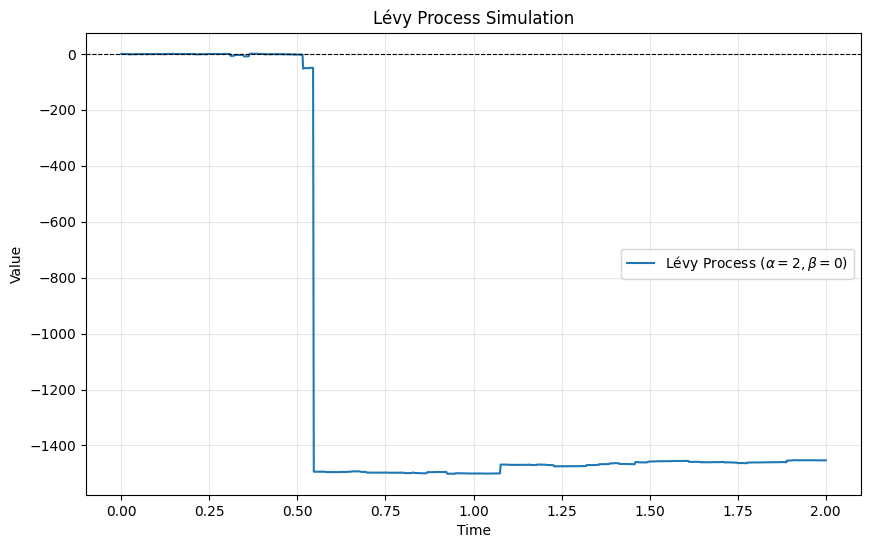

In [11]:
# Plot the Lévy process
plt.figure(figsize=(10, 6))
plt.plot(time_points, levy_process, label=f"Lévy Process ($\\alpha={alpha}, \\beta={beta}$)")
plt.title("Lévy Process Simulation")
plt.xlabel("Time")
plt.ylabel("Value")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Exchange Rate Analysis

In [12]:
data  =  pd.read_csv('/home/dvictoriano/Downloads/daily.csv')
countries  =  data["Country"].unique()
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

Text(0.5, 1.0, 'Distribution of Exchange Rate Canada')

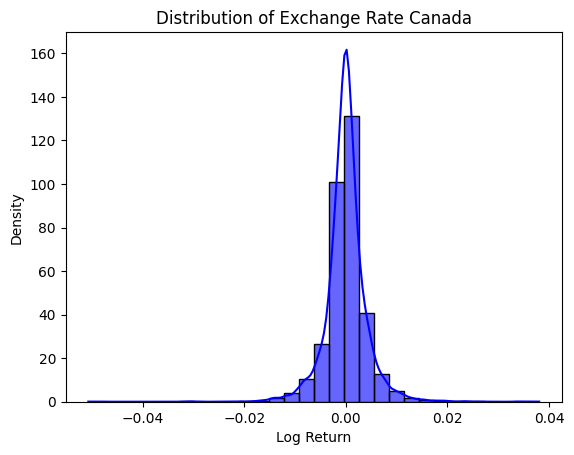

In [92]:
name  =  np.random.choice(countries)
country = data[data["Country"] == name]  # Filter for Australia
country = country.dropna(subset=["Exchange rate"])  # Drop rows with null ExchangeRate values
country['Log Return'] = np.log(country['Exchange rate'] / country['Exchange rate'].shift(1))
# plt.plot(country['Year'], country['Exchange rate'], label='Exchange Rate', color='blue', alpha=0.7)
# plt.plot(country['Year'], country['Log Return'], label='Log Return', color='red', alpha=0.7)
# plt.title(f'Exchange Rate and Log Returns for {name}')

sns.histplot(country['Log Return'], bins=30, kde=True, color='blue', alpha=0.6, stat="density", label="Histogram with KDE")
plt.title(f'Distribution of Exchange Rate {name}')